Design model (input, output size, forward pass)
<br> Construct loss and optimizer
<br>Training loop
- forward pass: compute prediction and loss
- backward pass: gradients
- update weights


In [30]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

Step 0: Prepare the data

In [31]:
X_numpy,y_numpy=datasets.make_regression(n_samples=100,n_features=1,noise=20,random_state=1)
X=torch.from_numpy(X_numpy.astype(np.float32))
y=torch.from_numpy(y_numpy.astype(np.float32))
y=y.view(y.shape[0],1)

In [32]:
y.shape

torch.Size([100, 1])

In [33]:
X.shape

torch.Size([100, 1])

In [34]:
n_samples,n_features=X.shape

In [35]:
input_size=n_features
output_size=1

In [36]:
model=nn.Linear(input_size,output_size)

In [37]:
learning_rate=0.01

In [38]:
criterion=nn.MSELoss()
optimizer=torch.optim.SGD(model.parameters(),lr=learning_rate)

In [39]:
num_epochs=100

In [40]:
for epoch in range(num_epochs):
    #forward pass
    y_predicted=model(X)
    #loss
    loss=criterion(y_predicted,y)
    #backward pass
    loss.backward()
    #update
    optimizer.step()
    optimizer.zero_grad()
    
    if (epoch+1) %10==0:
        print(f'{epoch +1 }, loss={loss.item():.4f}')

10, loss=4416.0737
20, loss=3295.9502
30, loss=2484.8982
40, loss=1897.0400
50, loss=1470.5554
60, loss=1160.8777
70, loss=935.8351
80, loss=772.1774
90, loss=653.0795
100, loss=566.3552


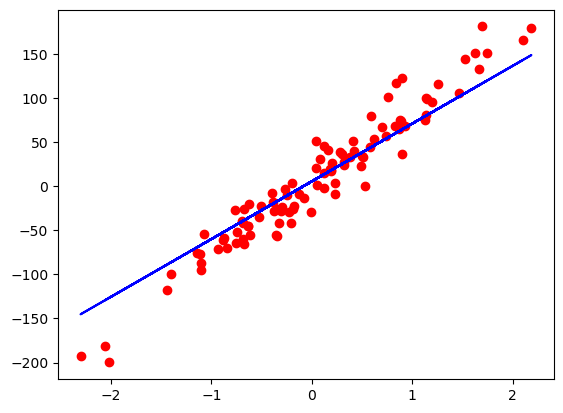

In [42]:
predicted=model(X).detach()
plt.plot(X_numpy,y,'ro')
plt.plot(X_numpy,predicted,'b')
plt.show()